<a href="https://colab.research.google.com/github/Alexflames/frame-detection/blob/master/PersonalTask_frame_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Автор
Григорьев Алексей, 451 группа, КНиИТ

## Задание
С помощью машинного обучения научиться различать рамки у картин для последующего вырезания и превращения изображений картин с рамками в картины **без** рамок

### Часть 1 - классическое решение на OpenCV
##### **"Простой" набор данных**
[Первый набор данных](https://drive.google.com/open?id=19Wx9l9C6IovJ5n1OTYzmt39w5cmIgzHJ) представляет 200 "простых для обработки" изображений картин с рамками,
собраны в поисковике google, посредством отфильтрации подходящих вручную.
- **Все** картины имеют рамки;
- Картины **не** повернуты под углом;
- Может быть свободное пространство любого цвета **до** рамки, **после** рамки перед изображением;
- Рамки преимущественно монотонные, но также иногда встречаются объмные варианты;
- Возможно наличие теней или других эффектов окружающего мира на центральной части изображения / с какой-то стороны от картины;
- Форматы изображений `.jpg | .png | .webp`;
- Изображения разных размеров, разное соотношение сторон;
- Различная цветовая гамма.

##### **Программа**
Далее следуют фрагменты программы для решения задачи



**Шаг №1**

Загрузка изображений из гугл-диска по ссылке. Выбор X изображений из набора и вывод на экран.

Фрагмент с загрузкой файлов взят из практики 3 с курса по ML. Слегка модифицирован

In [1]:
from google.colab import auth
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload

def download_data(file_id, file_name):
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()
    
  downloaded.seek(0)
  with open(file_name, "wb") as f:
    f.write(downloaded.read())

  
auth.authenticate_user()
drive_service = build('drive', 'v3')

folder_name = 'pictureset_simple_1'
file_id = '1IfQwOLV2YLbBDSHYg7o4QkWHfcsz7GLi'
file_name = folder_name + '.zip'

download_data(file_id, file_name)
!mkdir pictureset_simple_1
!unzip pictureset_simple_1.zip -d pictureset_simple_1
!ls

mkdir: cannot create directory ‘pictureset_simple_1’: File exists
Archive:  pictureset_simple_1.zip
replace pictureset_simple_1/pic1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
adc.json  pictureset_simple_1  pictureset_simple_1.zip	sample_data


In [0]:
# Можно раскомментировать и запустить чтобы посмотреть структуру проекта 
# !ls

In [0]:
# Можно раскомментировать и запустить чтобы посмотреть структуру проекта 
# !ls pictureset_simple_1

Возьмем X изображений из папки `pictureset_simple_1` и выведем на экран

In [0]:
import os
filenames = []
for filename in os.listdir(folder_name):
  filenames.append(os.path.join(folder_name, filename))

Выборка X изображений.

Смените флаг `show_images` на True чтобы вывести выбранные изображения на экран

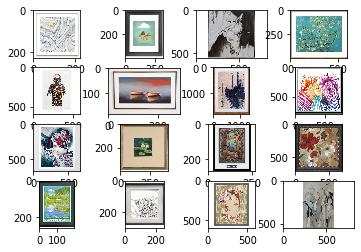

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X_images = 16

random_index = np.random.choice(range(len(filenames)), X_images)
chosen_pictures = []

for i_normal, index in enumerate(random_index):
  img_picked = cv2.imread(filenames[index])
  chosen_pictures.append(img_picked)

# Блок вывода изображений на экран
test_show_images = True

def nearest_square(limit):
    answer = 0
    while (answer+1)**2 < limit:
        answer += 1
    return (answer + 2)

def show_images(cv_images):
  X_nearest_square = nearest_square(X_images) - 1 # расположим X фигур в квадрате
  fig, axeslist = plt.subplots(ncols = X_nearest_square, nrows = X_nearest_square)
  
  for i in range(len(cv_images)):
    img_picked = cv_images[i]
    axeslist.ravel()[i].imshow(img_picked[:, :, ::-1]) # показ переведенного из BGR в RGB изображения
    #axeslist.ravel()[i].set_axis_off()
  
  plt.rcParams["figure.figsize"] = (14,14)
  plt.show()

if test_show_images:
  show_images(chosen_pictures)

С помощью средств OpenCV найдем рамки изображения, переведя Grayscale версию в ч/б с помощью функции `threshold`. Найденные контуры обрабатываются функцией `boundingRect` чтобы найти прямоугольник описывающий контур. К прямоугольнику предъявляются следующие условия:
- Его размер должен быть больше `size_threshold`
- Его центр должен быть удален от центра изображения не более чем на `eps_centre`

45 (8,) (2,)
60 (13,) (5,)
75 (27,) (14,)
90 (66,) (39,)
105 (157,) (91,)
120 (340,) (183,)
135 (661,) (321,)
150 (1085,) (424,)
165 (1630,) (545,)
180 (2275,) (645,)
195 (2887,) (612,)
210 (3428,) (541,)
225 (4051,) (623,)
240 (4634,) (583,)
(83.0, 80.5)
(83.5, 80.5)
(102.5, 114.0)
(153.5, 110.5)
(83.0, 72.5)
(126.0, 103.5)
(138.5, 134.0)
(63.5, 157.0)
size limit exceeded: 579 1139.0625
45 (23,) (14,)
60 (54,) (31,)
75 (73,) (19,)
90 (95,) (22,)
105 (108,) (13,)
120 (123,) (15,)
135 (138,) (15,)
150 (164,) (26,)
165 (196,) (32,)
180 (219,) (23,)
195 (318,) (99,)
210 (329,) (11,)
225 (338,) (9,)
240 (360,) (22,)
(160.0, 16.0)
(160.0, 391.0)
(207.0, 195.0)
(145.0, 261.5)
(168.5, 215.5)
(159.5, 20.5)
(162.0, 367.5)
(155.5, 163.0)
size limit exceeded: 2256 2880.0
45 (1825,) (839,)
60 (2415,) (590,)
75 (2982,) (567,)
90 (3527,) (545,)
105 (4088,) (561,)
120 (4672,) (584,)
135 (5360,) (688,)
150 (6084,) (724,)
165 (6969,) (885,)
180 (8614,) (1645,)
195 (9996,) (1382,)
210 (10056,) (60,)
225

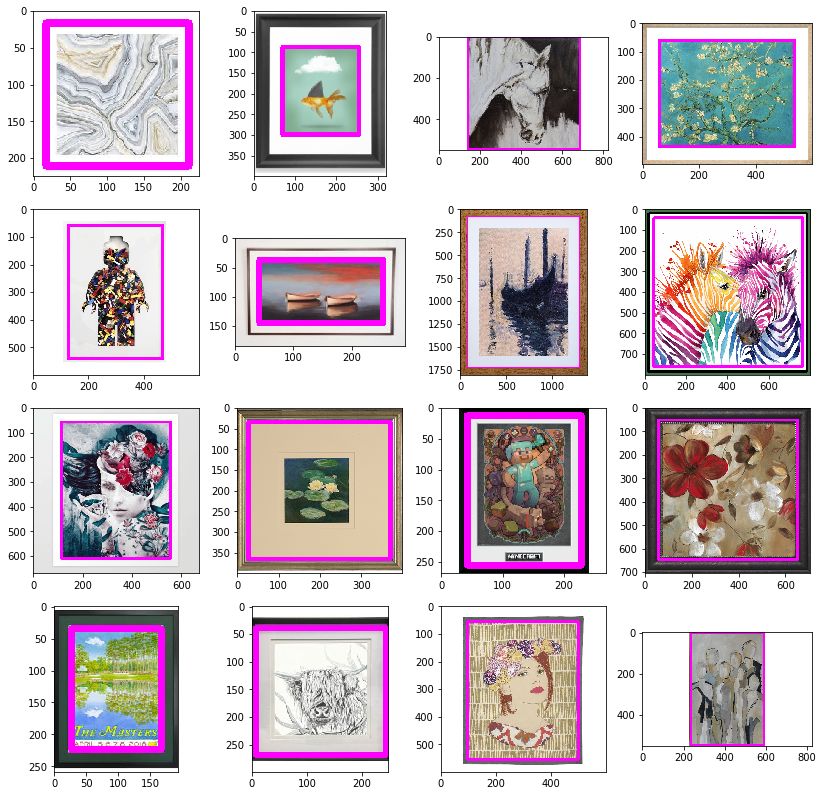

In [26]:
import cv2
import numpy as np

# Сортировка контуров по их длине
def sort_by_perimter(contour):
  return cv2.arcLength(contour, True)

def image_threshold(img, threshold):
  ret,thresh = cv2.threshold(img, threshold, 255, 0)  # все что ниже границы становится черным, выше - белым
  return thresh

def image_lower_colors(img, colors_count):
  img_1d = np.ravel(img)
  multiplier = 255 // colors_count
  for i in range(len(img_1d)):
    img_1d[i] = (img_1d[i] // multiplier) * multiplier
  return img 

def vary_threshold_contours(img):
  contours_return = []
  for threshold in range(30, 251, 15):
    img_filtered = image_threshold(img, threshold)
    _, contours, _ = cv2.findContours(img_filtered, 1, 2) # находим контуры
    if len(contours_return) == 0 and len(np.shape(contours)) == 1:
      contours_return = np.copy(contours)
    elif len(np.shape(contours)) == 1:
      contours_return = np.concatenate((contours_return, contours))
      print(threshold, np.shape(contours_return), np.shape(contours))
  return contours_return.tolist()

size_threshold = 0.15 ** 2
eps_centre = 0.03
def estimated_frames(img):
  imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  #_, contours, _ = cv2.findContours(img_filtered, 2, 2) # находим контуры
  contours = vary_threshold_contours(imgGray)

  contours.sort(key=sort_by_perimter, reverse=True)

  img_height = img.shape[0]
  img_width = img.shape[1]
  img_square = img_width * img_height
  
  boxes = []
  for cnt in contours:
    # ищем прямоугольник, описывающий контур
    x,y,w,h = cv2.boundingRect(cnt) # находим неповернутый прямоугольник, описывающий контур

    # проверка размера изображения (так как отсортированы, то можно полагать что все последующие не подходят)
    if w * h < img_square * size_threshold:
      print("size limit exceeded:", w * h, img_square * size_threshold)
      break

    # проверка центрированности, допускается отклонение на epsilon от ширины и высоты
    cnt_center = (x + w/2, y + h/2)
    #print(abs(cnt_center[1] - img_width / 2), abs(cnt_center[0] - img_height / 2))
    if abs(cnt_center[0] - img_width / 2) > eps_centre * img_width  or abs(cnt_center[1] - img_height / 2) > eps_centre * img_height:
      print(cnt_center)
      continue  

    # преобразуем из (x y w h) в numpy array точек
    box = np.array([np.array([x, y]), np.array([x+w, y]), np.array([x+w, y+h]), np.array([x, y+h])])      
    box = np.int0(box) # так делают в интернете, переводят в целые числа
    boxes.append(box)

  return boxes

def img_with_contour(img):
  frames = estimated_frames(img)
  if len(frames) > 0:
    cv2.drawContours(img, [frames[-1]], 0, (255, 0, 255), 10)
  return img

images_contoured = []
for i in range(len(chosen_pictures)):
  image_proceed = chosen_pictures[i].copy()
  images_contoured.append(img_with_contour(image_proceed))
show_images(images_contoured)

### Архив
Содержит старые функции, которые показали худший результат по сравнению с актуальным. Решил не удалять код на всякий случай.

In [0]:
def img_with_contour1887(img):
  imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret,thresh = cv2.threshold(imgGray, 200, 255, 0)  # все что ниже границы становится черным, выше - белым
  _, contours, _ = cv2.findContours(thresh, 1, 2) # находим контуры

  contours.sort(key=sort_by_perimter, reverse=True)
  n = 3
  cnts = contours[0:n] # выбираем первые n контуров
  for cnt in cnts:
    cv2.drawContours(img, [cnt], 0, (0, 0, 255), 3)
    # вариант 1 - но он ищет не минимум, вообще-то минимум но у меня почему-то нет
    x,y,w,h = cv2.boundingRect(cnt) # находим неповернутый прямоугольник, описывающий контур
    # преобразуем из (x y w h) в формат, принимаемый функцией отрисовки
    box = np.array([np.array([x, y]), np.array([x+w, y]), np.array([x+w, y+h]), np.array([x, y+h])])      
    cv2.drawContours(img, [box], 0, (0, 255, 0), 3)           

    # вариант 2 - возвращает минимальные но повернутые прямоугольники 
    # 2 точки в одномерном массиве, нужно в двумерном
    rect = cv2.minAreaRect(cnt) # находим прямоугольник (может повернутый), описывающий контур
    box = cv2.boxPoints(rect) # находим 4 вершины прямоугольника
    box = np.int0(box) # так делают в интернете, переводят в целые числа
    # принимает формат [[x1 y1] [x2 y2] [x3 y3] [x4 y4]]
    if (len([box]) > 0):
      cv2.drawContours(img, [box], 0, (255, 0, 255), 3)

  return img